Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [104]:
!curl -O https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  196M  100  196M    0     0  8958k      0  0:00:22  0:00:22 --:--:-- 10.7M


In [105]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

x instacart_2017_05_01/
x instacart_2017_05_01/aisles.csv
x instacart_2017_05_01/departments.csv
x instacart_2017_05_01/order_products__prior.csv
x instacart_2017_05_01/order_products__train.csv
x instacart_2017_05_01/orders.csv
x instacart_2017_05_01/products.csv


In [106]:
%cd instacart_2017_05_01

/Users/daniel/Google Drive/Lambda/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/instacart_2017_05_01


In [107]:
!ls -lh *.csv

-rw-r--r--@ 1 daniel  staff   2.5K May  2  2017 aisles.csv
-rw-r--r--@ 1 daniel  staff   270B May  2  2017 departments.csv
-rw-r--r--@ 1 daniel  staff   551M May  2  2017 order_products__prior.csv
-rw-r--r--@ 1 daniel  staff    24M May  2  2017 order_products__train.csv
-rw-r--r--@ 1 daniel  staff   104M May  2  2017 orders.csv
-rw-r--r--@ 1 daniel  staff   2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [325]:
# I want ti list the columns of all csv's in a certian directory
# My OCD is bothering me atm. Trying to remember that I just need
# to do what is asked, not all this extra stuff.

def list_headers(folder:str):
    
    import pandas as pd
    import glob as gb

    d = gb.glob(folder + "*.csv")

    for f in d:        
        df = pd.read_csv(f)
        print(f)
        print('************************ Shape:' + str(df.shape))          
        for col in df.columns:
            print(col) 
        print('')    

In [326]:
# List the columns and see which one we need
dir = ''
print(list_headers(dir))

products.csv
************************ Shape:(49688, 4)
product_id
product_name
aisle_id
department_id

orders.csv
************************ Shape:(3421083, 7)
order_id
user_id
eval_set
order_number
order_dow
order_hour_of_day
days_since_prior_order

order_products__train.csv
************************ Shape:(1384617, 4)
order_id
product_id
add_to_cart_order
reordered

departments.csv
************************ Shape:(21, 2)
department_id
department

aisles.csv
************************ Shape:(134, 2)
aisle_id
aisle

order_products__prior.csv
************************ Shape:(32434489, 4)
order_id
product_id
add_to_cart_order
reordered

None


In [327]:
import pandas as pd

In [328]:
# Loading all the datasets that could be used

# Order Products Prior
order_products__prior = pd.read_csv('order_products__prior.csv')

# Order Products Train
order_products__train = pd.read_csv('order_products__train.csv')

# Orders
orders = pd.read_csv('orders.csv')

# Products
products = pd.read_csv('products.csv')

In [329]:
# I want to concencate train and prior
order_products = pd.concat([order_products__prior, order_products__train])

In [330]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [331]:
# Look at products
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [332]:
# merge products
products_merged = pd.merge(order_products, products, on='product_id', how='inner')

In [333]:
products_merged.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,26,33120,5,0,Organic Egg Whites,86,16
2,120,33120,13,0,Organic Egg Whites,86,16
3,327,33120,5,1,Organic Egg Whites,86,16
4,390,33120,28,1,Organic Egg Whites,86,16


In [334]:
# Drop uneeded columns
products_merged = products_merged.drop(['add_to_cart_order', 
                                        'aisle_id', 
                                        'department_id',
                                        'reordered'], 
                                         axis = 1)

In [335]:
products_merged.head()

,order_id,product_id,product_name
0,2,33120,Organic Egg Whites
1,26,33120,Organic Egg Whites
2,120,33120,Organic Egg Whites
3,327,33120,Organic Egg Whites
4,390,33120,Organic Egg Whites


In [336]:
# Get the counts

theproducts = ['Banana',
               'Bag of Organic Bananas',
               'Organic Strawberries',
               'Organic Baby Spinach',
               'Organic Hass Avocado',
               'Organic Avocado',
               'Large Lemon',
               'Strawberries',
               'Limes',
               'Organic Whole Milk']


# Subsetting just those in the list
thecondition = products_merged['product_name'].isin(theproducts)
thesubset = products_merged[thecondition]
thesubset.head()



,order_id,product_id,product_name
262494,3,21903,Organic Baby Spinach
262495,26,21903,Organic Baby Spinach
262496,31,21903,Organic Baby Spinach
262497,39,21903,Organic Baby Spinach
262498,56,21903,Organic Baby Spinach


In [352]:
# Turing the counts into a dataframe, resetting index, and setting col
values = pd.DataFrame(thesubset['product_name'].value_counts())
values = values.reset_index()
values.columns = ['Product Name', 'Count']
values.head(20)


,Product Name,Count
0,Banana,491291
1,Bag of Organic Bananas,394930
2,Organic Strawberries,275577
3,Organic Baby Spinach,251705
4,Organic Hass Avocado,220877
5,Organic Avocado,184224
6,Large Lemon,160792
7,Strawberries,149445
8,Limes,146660
9,Organic Whole Milk,142813


In [343]:
#I don't know why Bannannnnnanas is howing up first 
values.dtypes


Product Name    object
Count            int64
dtype: object

In [345]:
values.shape


(10, 2)

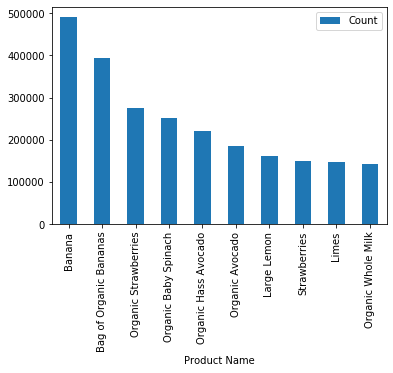

In [339]:
# Vizualize it
values.plot(kind='bar', x='Product Name', y='Count')

## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [264]:
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [256]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [265]:
# table2 -> tidy
# row index as new column
table2 = table2.reset_index()
table2.head()

,index,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [284]:
tidy = table2.melt(id_vars='index')

tidy

,index,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [285]:
# Rename Columns
tidy.columns = ['trt', 'Name', 'Value']
tidy.columns

Index(['trt', 'Name', 'Value'], dtype='object')

In [286]:
tidy.head()

,trt,Name,Value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0


In [287]:
# strip 'treatment', leaving just a or b
tidy.trt = tidy.trt.str.replace('treatment', '')

In [288]:
tidy.head()

,trt,Name,Value
0,a,John Smith,NaN
1,b,John Smith,2.0
2,a,Jane Doe,16.0
3,b,Jane Doe,11.0
4,a,Mary Johnson,3.0


In [292]:
# tidy -> table2
table2 = tidy.pivot_table(index='trt', columns='Name', values='Value')
table2.head()

Name,Jane Doe,John Smith,Mary Johnson
trt,,,
a,16.0,NaN,3.0
b,11.0,2.0,1.0


In [296]:

flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [299]:
# Flights Pivot Table
pivot = flights.pivot_table(index='year', columns='month', values='passengers')
pivot.head()

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


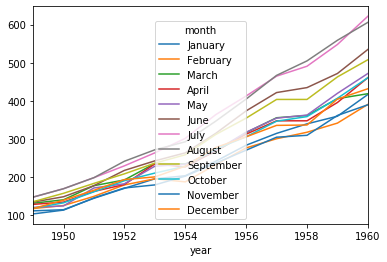

In [302]:
# Just curious. The data became much more understandable when I used pivot. It "popped". I can
# see by the plot, that the number of flights definitly increases with time. More so in May and
# June. 
pivot.plot()

In [ ]:
# WAS GOING TO DO THE STRETCH BUT DID NOT HAVE TIME

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [ ]:
##### YOUR CODE HERE #####

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [ ]:
##### YOUR CODE HERE #####